In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
pd.options.mode.chained_assignment = None
scaler = MinMaxScaler(feature_range=(0, 1))
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from sklearn.ensemble._forest import RandomForestRegressor as rf
from pandas.plotting import lag_plot
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
def decision_tree(file):
    
    # DATA 
    data = pd.read_csv(file)
    
    # FORMATTING THE DATE
    value = 0
    try:
        datetime.strptime(data['Date'][0], '%Y-%m-%d')
        value = 0
    except ValueError:
        value = 1
    if value == 1:
        data['Date'] = pd.to_datetime(data.Date,format='%d-%m-%Y')
    else:
        data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
    data.index = data['Date']
    
    # SORTING THE DATA
    data_sort = data.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close'])
    
    # NEW DATASET WITH ONLY THE TWO COLUMNS NECESSARY
    for i in range(0,len(data_sort)):
        new_data['Date'][i] = data_sort['Date'][i]
        new_data['Close'][i] = data_sort['Close'][i]
    
    new_data['Date'] = new_data['Date'].apply(pd.Timestamp.timestamp)
    new_data['Close'] = new_data['Close']
    
    
    # DIVIDING TEST AND TRAIN CASES
    number = int(0.8*len(new_data['Close']))
    train = new_data[:number]
    test = new_data[number:]
    
    trainX = train.drop('Close', axis=1)
    trainY = train['Close']
    testX = test.drop('Close', axis=1)
    testY = test['Close']
    
    # SCALING THE DATA
    trainX_scaled = scaler.fit_transform(trainX)
    trainX = pd.DataFrame(trainX_scaled)
    testX_scaled = scaler.fit_transform(testX)
    testX = pd.DataFrame(testX_scaled)
    
    # MODEL
    model = DecisionTreeRegressor()
    model.fit(trainX, trainY)
    
    # PREDICTIONS
    preds = []
    preds = model.predict(testX)
    
    # PREDICTIONS GRAPH
    test['Predictions'] = 0
    test['Predictions'] = preds
    
    train['Date'][:] = data['Date'][:number]
    train.index = train['Date']
    test['Date'][:] = data['Date'][number:]
    test.index = test['Date']
    
    train['Close'].plot(color = 'cornflowerblue', label = 'DATA-COMPANY 5: TRAINING DATA')
    test['Close'].plot(color = 'lightblue', label = 'DATA-COMPANY 5: ACTUAL STOCK PRICES')
    
    # PLOT
    test['Predictions'].plot(label = 'DECISION TREE: PREDICTED STOCK PRICES')

In [3]:
def linear_regression(file):
    
    # DATA 
    data = pd.read_csv(file)
    
    # FORMATTING THE DATE
    value = 0
    try:
        datetime.strptime(data['Date'][0], '%Y-%m-%d')
        value = 0
    except ValueError:
        value = 1
    if value == 1:
        data['Date'] = pd.to_datetime(data.Date,format='%d-%m-%Y')
    else:
        data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
    data.index = data['Date']
    
    data_sort = data.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close'])
    
    # NEW DATASET WITH ONLY THE TWO COLUMNS NECESSARY
    for i in range(0,len(data_sort)):
        new_data['Date'][i] = data_sort['Date'][i]
        new_data['Close'][i] = data_sort['Close'][i]
    
    new_data['Date'] = new_data['Date'].apply(pd.Timestamp.timestamp)
    new_data['Close'] = new_data['Close']
    
    
    # DIVIDING TEST AND TRAIN CASES
    number = int(0.8*len(new_data['Close']))
    train = new_data[:number]
    test = new_data[number:]
    
    trainX = train.drop('Close', axis=1)
    trainY = train['Close']
    testX = test.drop('Close', axis=1)
    testY = test['Close']
    
    # SCALING THE DATA
    trainX_scaled = scaler.fit_transform(trainX)
    trainX = pd.DataFrame(trainX_scaled)
    testX_scaled = scaler.fit_transform(testX)
    testX = pd.DataFrame(testX_scaled)
    
    # MODEL
    model = LinearRegression()
    model.fit(trainX,trainY)
    
    # PREDICTIONS
    preds = []
    preds = model.predict(testX)
    
    # PREDICTIONS GRAPH
    test['Predictions'] = 0
    test['Predictions'] = preds
    
    train['Date'][:] = data['Date'][:number]
    train.index = train['Date']
    test['Date'][:] = data['Date'][number:]
    test.index = test['Date']
    
    # PLOT
    test['Close'].plot(color = 'cornflowerblue', label = 'DATA-COMPANY 5: TESTING-DATA ACTUAL STOCK PRICES')
    test['Predictions'].plot(label = 'LINEAR REGRESSION: PREDICTED STOCK PRICES')

In [4]:
def svr(file):
    
    # DATA 
    data = pd.read_csv(file)
    
    # FORMATTING THE DATE
    value = 0
    try:
        datetime.strptime(data['Date'][0], '%Y-%m-%d')
        value = 0
    except ValueError:
        value = 1
    if value == 1:
        data['Date'] = pd.to_datetime(data.Date,format='%d-%m-%Y')
    else:
        data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
    data.index = data['Date']
    
    data_sort = data.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close'])
    
    # NEW DATASET WITH ONLY THE TWO COLUMNS NECESSARY
    for i in range(0,len(data_sort)):
        new_data['Date'][i] = data_sort['Date'][i]
        new_data['Close'][i] = data_sort['Close'][i]
    
    new_data['Date'] = new_data['Date'].apply(pd.Timestamp.timestamp)
    new_data['Close'] = new_data['Close']
    
    
    # DIVIDING TEST AND TRAIN CASES
    number = int(0.8*len(new_data['Close']))
    train = new_data[:number]
    test = new_data[number:]
    
    trainX = train.drop('Close', axis=1)
    trainY = train['Close']
    testX = test.drop('Close', axis=1)
    testY = test['Close']
    
    # SCALING THE DATA
    
    trainX_scaled = scaler.fit_transform(trainX)
    trainX = pd.DataFrame(trainX_scaled)
    testX_scaled = scaler.fit_transform(testX)
    testX = pd.DataFrame(testX_scaled)
    
    # MODEL
    model = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
    model.fit(trainX, trainY)
    
    # PREDICTIONS
    preds = []
    preds = model.predict(testX)
    
    # PREDICTIONS GRAPH
    test['Predictions'] = 0
    test['Predictions'] = preds
    
    train['Date'][:] = data['Date'][:number]
    train.index = train['Date']
    test['Date'][:] = data['Date'][number:]
    test.index = test['Date']

    # PLOT
    test['Predictions'].plot(label = 'SVR: PREDICTED STOCK PRICES')

In [5]:
def knn(file):
    
    # DATA 
    data = pd.read_csv(file)
    
    # FORMATTING THE DATE
    value = 0
    try:
        datetime.strptime(data['Date'][0], '%Y-%m-%d')
        value = 0
    except ValueError:
        value = 1
    if value == 1:
        data['Date'] = pd.to_datetime(data.Date,format='%d-%m-%Y')
    else:
        data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
    data.index = data['Date']
    
    data_sort = data.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close'])
    
    # NEW DATASET WITH ONLY THE TWO COLUMNS NECESSARY
    for i in range(0,len(data_sort)):
        new_data['Date'][i] = data_sort['Date'][i]
        new_data['Close'][i] = data_sort['Close'][i]
    
    new_data['Date'] = new_data['Date'].apply(pd.Timestamp.timestamp)
    new_data['Close'] = new_data['Close']
    
    
    # DIVIDING TEST AND TRAIN CASES
    number = int(0.8*len(new_data['Close']))
    train = new_data[:number]
    test = new_data[number:]
    
    trainX = train.drop('Close', axis=1)
    trainY = train['Close']
    testX = test.drop('Close', axis=1)
    testY = test['Close']
    
    # SCALING THE DATA
    trainX_scaled = scaler.fit_transform(trainX)
    trainX = pd.DataFrame(trainX_scaled)
    testX_scaled = scaler.fit_transform(testX)
    testX = pd.DataFrame(testX_scaled)
    
    # USING GRIDSEARCH TO FIND THE BEST PARAMETER
    params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
    knn = neighbors.KNeighborsRegressor()
    model = GridSearchCV(knn, params, cv=5)

    # MODEL
    model.fit(trainX,trainY)
    preds = model.predict(testX)
    
    # PREDICTIONS
    preds = []
    preds = model.predict(testX)
    
    # PREDICTIONS GRAPH
    test['Predictions'] = 0
    test['Predictions'] = preds
    
    train['Date'][:] = data['Date'][:number]
    train.index = train['Date']
    test['Date'][:] = data['Date'][number:]
    test.index = test['Date']
    
    # PLOT
    test['Predictions'].plot(label = 'KNN: PREDICTED STOCK PRICES')

In [6]:
def moving_average(file):
    
    # DATA 
    data = pd.read_csv(file)
    
    # FORMATTING THE DATE
    value = 0
    try:
        datetime.strptime(data['Date'][0], '%Y-%m-%d')
        value = 0
    except ValueError:
        value = 1
    if value == 1:
        data['Date'] = pd.to_datetime(data.Date, format = '%d-%m-%Y')
    else:
        data['Date'] = pd.to_datetime(data.Date, format = '%Y-%m-%d')
    data.index = data['Date']
    
    
    data_sort = data.sort_index(ascending = True, axis = 0)
    new_data = pd.DataFrame(index = range(0, len(data)), columns = ['Date', 'Close'])
    
    # NEW DATASET WITH ONLY THE TWO COLUMNS NECESSARY
    for i in range(0,len(data_sort)):
        new_data['Date'][i] = data_sort['Date'][i]
        new_data['Close'][i] = data_sort['Close'][i]
    
    new_data['Date'] = new_data['Date'].apply(pd.Timestamp.timestamp)
    new_data['Close'] = new_data['Close']
    
    
    # DIVIDING TEST AND TRAIN CASES
    number = int(0.8*len(new_data['Close']))
    train = new_data[:number]
    test = new_data[number:]
    
 
    # PREDICTIONS
    preds = []
    test_shape = data.shape[0]-number
    for i in range(0,test_shape):
        a = train['Close'][(len(train) - test_shape + i) :].sum() + sum(preds)
        b = a/(test_shape)
        preds.append(b)
    
    # 
    test['Predictions'] = 0
    test['Predictions'] = preds
    
    test['Date'][:] = data['Date'][number:]
    test.index = test['Date']
    
    # PLOT
    test['Predictions'].plot(label = 'MOVING AVERAGE: PREDICTED STOCK PRICES')

In [7]:
def lstm(file):
    
    # DATA 
    df = pd.read_csv(file)
    
    # FORMATTING THE DATE
    value = 0
    try:
        datetime.strptime(df['Date'][0], '%Y-%m-%d')
        value = 0
    except ValueError:
        value = 1
    if value == 1:
        df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')
    else:
        df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
    df.index = df['Date']
    
    # SORTING
    data = df.sort_index(ascending=True, axis=0)
    
    new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
    for i in range(0,len(data)):
        new_data['Date'][i] = data['Date'][i]
        new_data['Close'][i] = data['Close'][i]

    # INDEXING
    new_data.index = new_data.Date
    new_data.drop('Date', axis=1, inplace=True)

    # # DIVIDING THE DATA AND SCALING
    dataset = new_data.values
    number = int(0.8*len(data))
    train = dataset[0:number,:]
    valid = dataset[number:,:]

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    x_train, y_train = [], []
    for i in range(60,len(train)):
        x_train.append(scaled_data[i-60:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)

    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

    # LSTM MODEL
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

    # PREDICTION
    inputs = new_data[len(new_data) - len(valid) - 60:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)

    X_test = []
    for i in range(60,inputs.shape[0]):
        X_test.append(inputs[i-60:i,0])
    X_test = np.array(X_test)

    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    # PREDICTIONS
    train = new_data[:number]
    valid = new_data[number:]
    valid['Predictions'] = closing_price
    
    # PLOT
    valid['Predictions'].plot(label = 'LSTM: PREDICTED STOCK PRICES')

In [8]:
# RANDOM FOREST
def random_forest(file):
    
    # DATA 
    data = pd.read_csv(file)
    
    # FORMATTING THE DATE
    value = 0
    try:
        datetime.strptime(data['Date'][0], '%Y-%m-%d')
        value = 0
    except ValueError:
        value = 1
    if value == 1:
        data['Date'] = pd.to_datetime(data.Date,format='%d-%m-%Y')
    else:
        data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
    data.index = data['Date']
    
    # SORTING THE DATA
    data_sort = data.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close'])
    
    # NEW DATASET WITH ONLY THE TWO COLUMNS NECESSARY
    for i in range(0,len(data_sort)):
        new_data['Date'][i] = data_sort['Date'][i]
        new_data['Close'][i] = data_sort['Close'][i]
    
    new_data['Date'] = new_data['Date'].apply(pd.Timestamp.timestamp)
    new_data['Close'] = new_data['Close']
    
    pd.DataFrame(new_data)
    
    # DIVIDING TEST AND TRAIN CASES
    number = int(0.8*len(new_data['Close']))
    train = new_data[:number]
    test = new_data[number:]
    
    trainX = train.drop('Close', axis=1)
    trainY = train['Close']
    testX = test.drop('Close', axis=1)
    testY = test['Close']
    
    # SCALING THE DATA
    pd.options.mode.chained_assignment = None
    scaler = MinMaxScaler(feature_range=(0, 1))
    
    trainX_scaled = scaler.fit_transform(trainX)
    trainX = pd.DataFrame(trainX_scaled)
    testX_scaled = scaler.fit_transform(testX)
    testX = pd.DataFrame(testX_scaled)
    
    # MODEL
    model = rf(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18) 
    model.fit(trainX,trainY)
    
    # PREDICTIONS
    preds = []
    preds = model.predict(testX)
    
    # PREDICTIONS GRAPH
    test['Predictions'] = 0
    test['Predictions'] = preds
    
    # INDEXING THE DATA TO YEARS
    test.index = data_sort['Date'][number:].index
    train.index = data_sort['Date'][:number].index
    
    # PLOTTING THE GRAPH
    test['Predictions'].plot(label = 'RANDOM FOREST: PREDICTED STOCK PRICES')

In [9]:
# AUTO ARIMA
def test_stationarity(timeseries):
        #Determing rolling statistics
        rolmean = timeseries.rolling(12).mean()
        rolstd = timeseries.rolling(12).std()
        adft = adfuller(timeseries, autolag='AIC')
        output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
        for key,values in adft[4].items():
            output['critical value (%s)'%key] =  values

In [10]:
# AUTO ARIMA
def arima(file):
    
    # DATA 
    data = pd.read_csv(file)
    
    # FORMATTING THE DATE
    value = 0
    try:
        datetime.strptime(data['Date'][0], '%Y-%m-%d')
        value = 0
    except ValueError:
        value = 1
    if value == 1:
        data['Date'] = pd.to_datetime(data.Date,format='%d-%m-%Y')
    else:
        data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
    data.index = data['Date']
    
    #SORTING IN ASCENDING ORDER
    data = data.sort_index(ascending=True, axis=0)
    
    # NEW DATASET WITH ONLY THE TWO COLUMNS NECESSARY
    data_close = data['Close']
    
    # CHECKING IF STATIONARY
    test_stationarity(data_close)
    
    # LOG THE DATA
    data_log = np.log(data_close)
    pd.DataFrame(data_log)

    # DIVIDING TEST AND TRAIN CASES
    number = int(0.8*len(data['Close']))
    train = data_log[:number]
    test = data_log[number:]
    
    # MODEL
    model_autoARIMA = auto_arima(train, start_p=0, start_q=0,
                      test='adf',       
                      max_p=3, max_q=3, 
                      m=1,              
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    
    # FITTED MODEL
    model = ARIMA(train, order=(1,1,1))  
    fitted = model.fit(disp=-1)  

    # PREDICTIONS
    fc, se, conf = fitted.forecast(len(data)-int(0.8*len(data)), alpha=0.05)
    fc_series = pd.Series(np.exp(fc), index = test.index)
    
    # PLOT
    plt.plot(fc_series, label = 'AUTO ARIMA: PREDICTED STOCK PRICES')
    plt.title('STOCK PRICE PREDICTION')
    plt.xlabel('TIME IN YEARS')
    plt.ylabel('CLOSE STOCK PRICE')

8292/8292 - 355s - loss: 1.2619e-05 - 355s/epoch - 43ms/step
66/66 [==============================] - 2s 13ms/step
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-34365.275, Time=0.97 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-34368.248, Time=0.60 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-34368.462, Time=2.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-34364.090, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-34364.936, Time=1.44 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-34370.017, Time=2.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-34367.210, Time=4.24 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-34376.598, Time=1.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-34379.963, Time=3.37 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-34377.824, Time=5.72 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-34373.326, Time=13.07 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-34378.590, Time=3.90 sec

Best model:  ARIMA(1,1,3

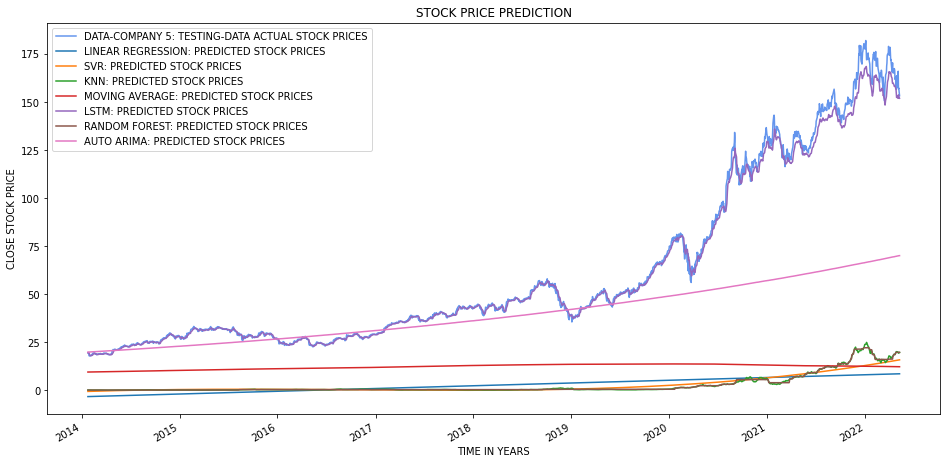

In [11]:
plt.figure(figsize=(16,8))
# decision_tree('AAPL.csv')
linear_regression('AAPL.csv')
svr('AAPL.csv')
knn('AAPL.csv')
moving_average('AAPL.csv')
lstm('AAPL.csv')
random_forest('AAPL.csv')
arima('AAPL.csv')
plt.legend()